In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
dogecoin = yf.Ticker('DOGE-USD')

dogecoin1y = dogecoin.history(period="1y")

dogecoin2y = dogecoin.history(period="2y")

dogecoin5y = dogecoin.history(period="5y")


In [3]:
dogecoin

yfinance.Ticker object <DOGE-USD>

<Axes: title={'center': 'Dogecoin Price'}, xlabel='Date'>

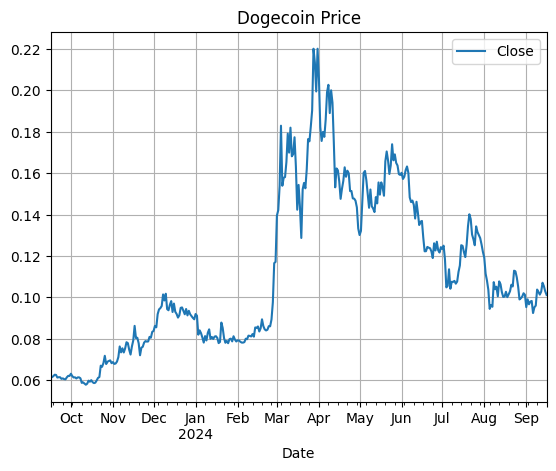

In [4]:
dogecoin1y.plot(y='Close', title='Dogecoin Price', grid=True)

<Axes: title={'center': 'Dogecoin Price'}, xlabel='Date'>

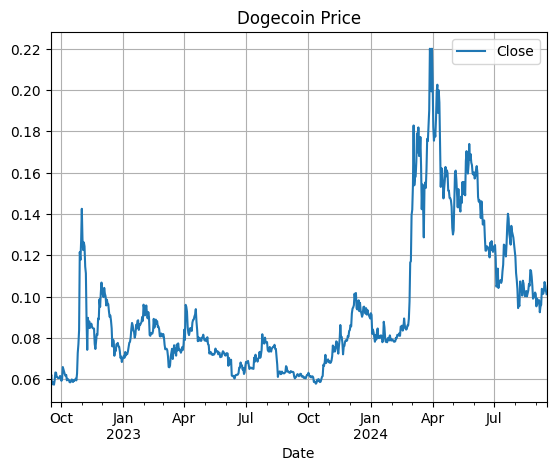

In [5]:
dogecoin2y.plot(y='Close', title='Dogecoin Price', grid=True)

<Axes: title={'center': 'Dogecoin Price'}, xlabel='Date'>

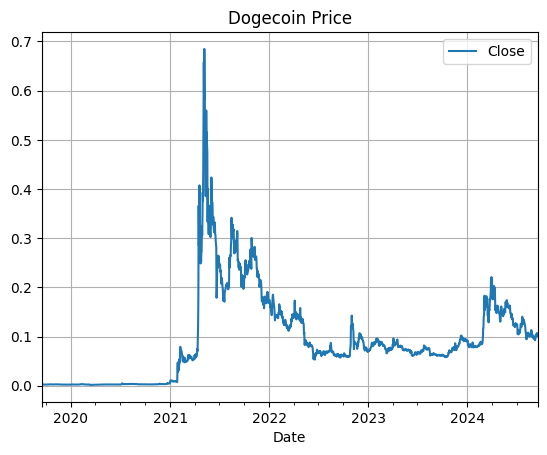

In [6]:
dogecoin5y.plot(y='Close', title='Dogecoin Price', grid=True)

Como apresentado na `análise_inicial.md`, não será utilizado o dogecoin5y por causa do pico apresentado, que desregularia o modelo. Sendo assim, será usado o 2y, que contém dados de um pouco antes de 2023 até o atual.

In [8]:
dogecoin2y

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-16 00:00:00+00:00,0.058792,0.060423,0.058453,0.060423,247011315,0.0,0.0
2022-09-17 00:00:00+00:00,0.060430,0.062315,0.060330,0.062210,209604119,0.0,0.0
2022-09-18 00:00:00+00:00,0.062210,0.062210,0.057238,0.057520,265405124,0.0,0.0
2022-09-19 00:00:00+00:00,0.057519,0.058744,0.056180,0.058612,301268389,0.0,0.0
2022-09-20 00:00:00+00:00,0.058612,0.060262,0.057738,0.058417,294929293,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-12 00:00:00+00:00,0.101378,0.103207,0.100636,0.102799,439730013,0.0,0.0
2024-09-13 00:00:00+00:00,0.102799,0.108290,0.101865,0.107114,675630464,0.0,0.0
2024-09-14 00:00:00+00:00,0.107113,0.107558,0.104643,0.105467,426157956,0.0,0.0


In [9]:
dogecoin2y.index.max()

Timestamp('2024-09-16 00:00:00+0000', tz='UTC')

In [10]:
dogecoin2y.index.min()

Timestamp('2022-09-16 00:00:00+0000', tz='UTC')

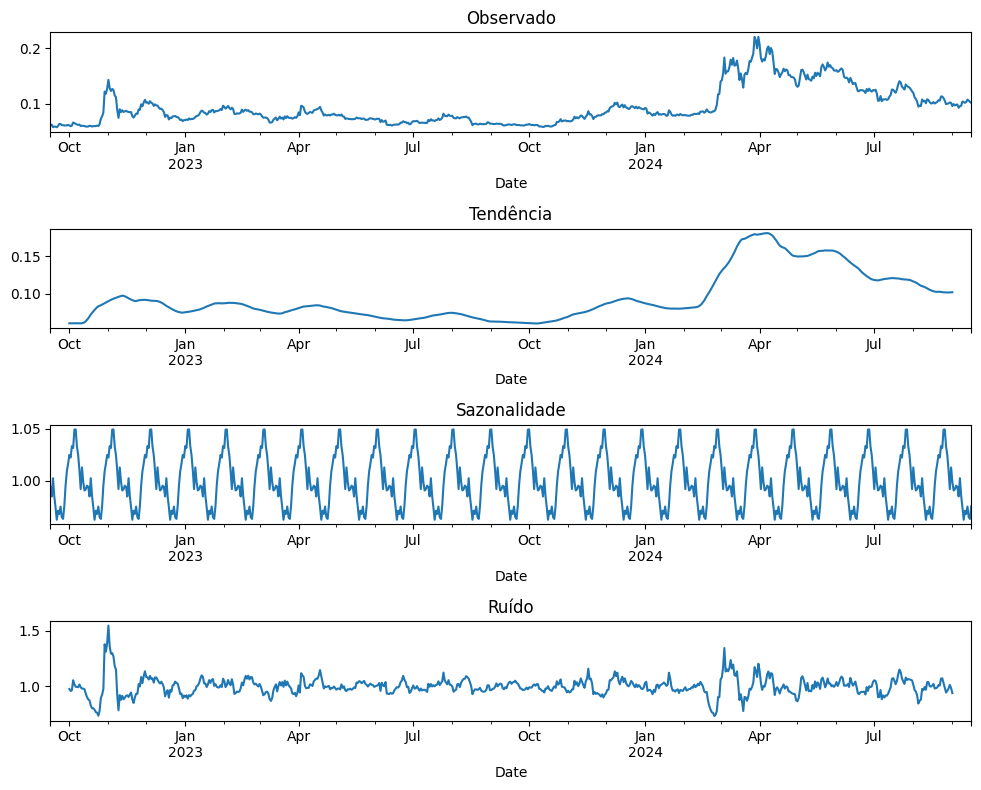

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompondo a série temporal
decomposition = seasonal_decompose(dogecoin2y['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observado')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Ruído')
plt.tight_layout()